In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     

In [13]:
data = pd.read_csv('AirPassengers.csv')

In [14]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [15]:
data.set_index('Month', inplace = True)
data.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [16]:
data

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


<Axes: xlabel='Month'>

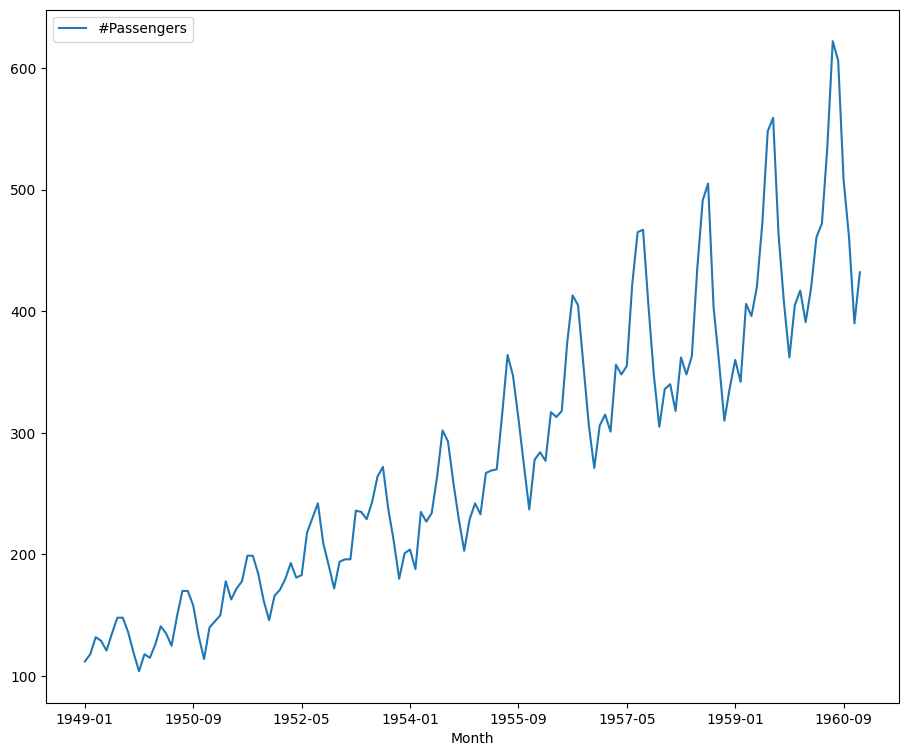

In [17]:
data.plot()

In [21]:
df = data
# превратим дату (наш индекс) в объект datetime
df.index = pd.to_datetime(df.index)

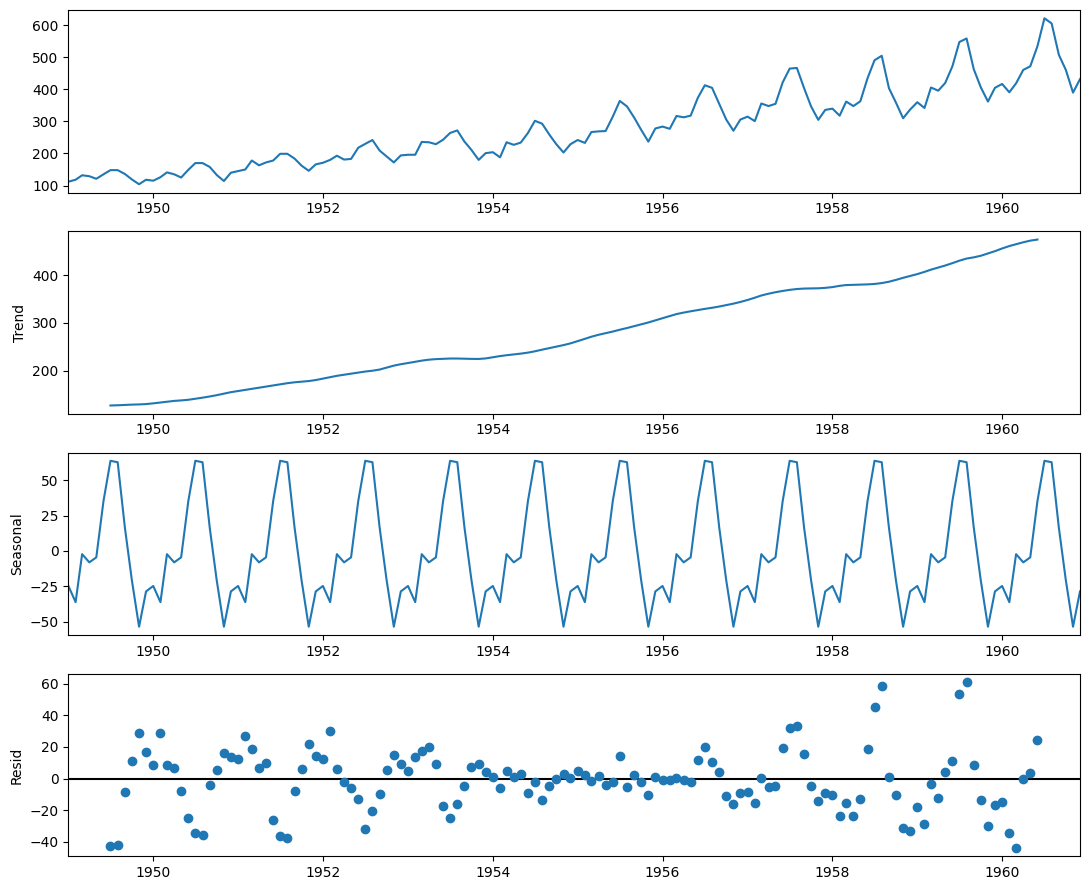

In [22]:
# импортируем функцию seasonal_decompose из statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
 
# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
 
# применяем функцию к данным о перевозках
decompose = seasonal_decompose(df)
decompose.plot()
 
plt.show()

In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [24]:
rolling_mean = df['#Passengers'].rolling(window=12).mean()
rolling_std = df['#Passengers'].rolling(window=12).std()

In [48]:
import statsmodels

In [51]:
order = ARIMA(df['#Passengers'], order=(3,1,1)).fit()

print(order.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -684.807
Date:                Wed, 19 Apr 2023   AIC                           1379.614
Time:                        02:44:31   BIC                           1394.428
Sample:                    01-01-1949   HQIC                          1385.634
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0436      0.101     10.335      0.000       0.846       1.242
ar.L2         -0.4074      0.123     -3.307      0.001      -0.649      -0.166
ar.L3         -0.0773      0.092     -0.840      0.4

In [68]:
predictions = order.forecast(steps=12)
print(predictions)

1961-01-01    468.428591
1961-02-01    494.821130
1961-03-01    504.277639
1961-04-01    500.578968
1961-05-01    490.826901
1961-06-01    481.425731
1961-07-01    475.873518
1961-08-01    474.662903
1961-09-01    476.387984
1961-10-01    479.110543
1961-11-01    481.342552
1961-12-01    482.429389
Freq: MS, Name: predicted_mean, dtype: float64


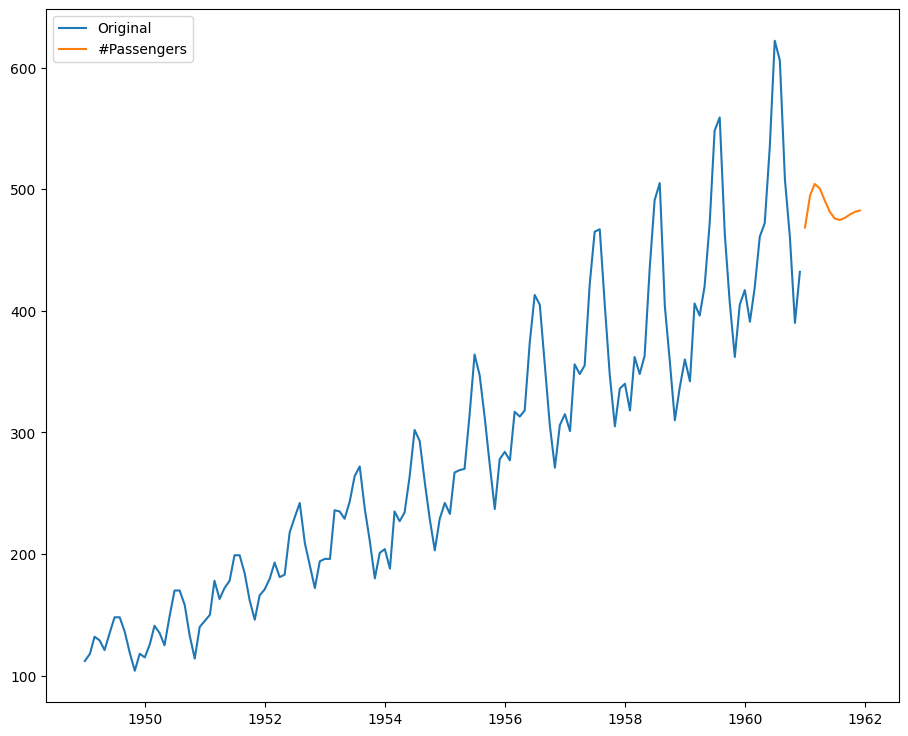

In [69]:
plt.plot(df.index, df['#Passengers'], label='Original')
plt.plot(predictions.index, predictions.values, label='#Passengers')
plt.legend()
plt.show()

In [62]:
df_smoothed = df.rolling(window=12).mean()

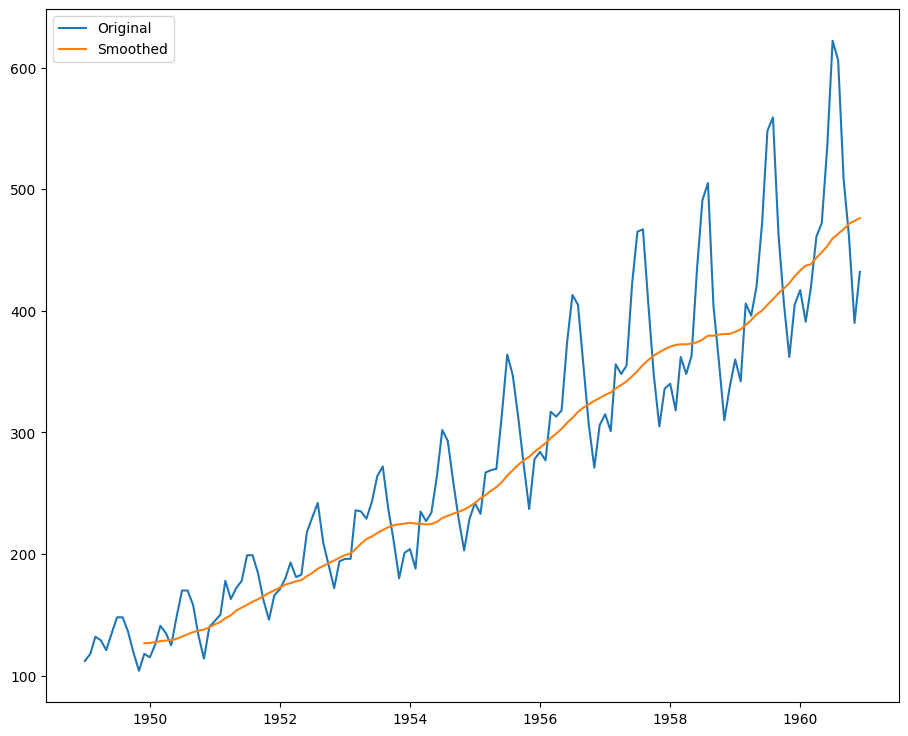

In [63]:
plt.plot(df.index, df['#Passengers'], label='Original')
plt.plot(df_smoothed.index, df_smoothed['#Passengers'], label='Smoothed')
plt.legend()
plt.show()

In [70]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(df['#Passengers'], seasonal='add', seasonal_periods=12)
results = model.fit()

future_dates = pd.date_range(start=df.index[-1], periods=12, freq='MS')
forecast = results.forecast(len(future_dates))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


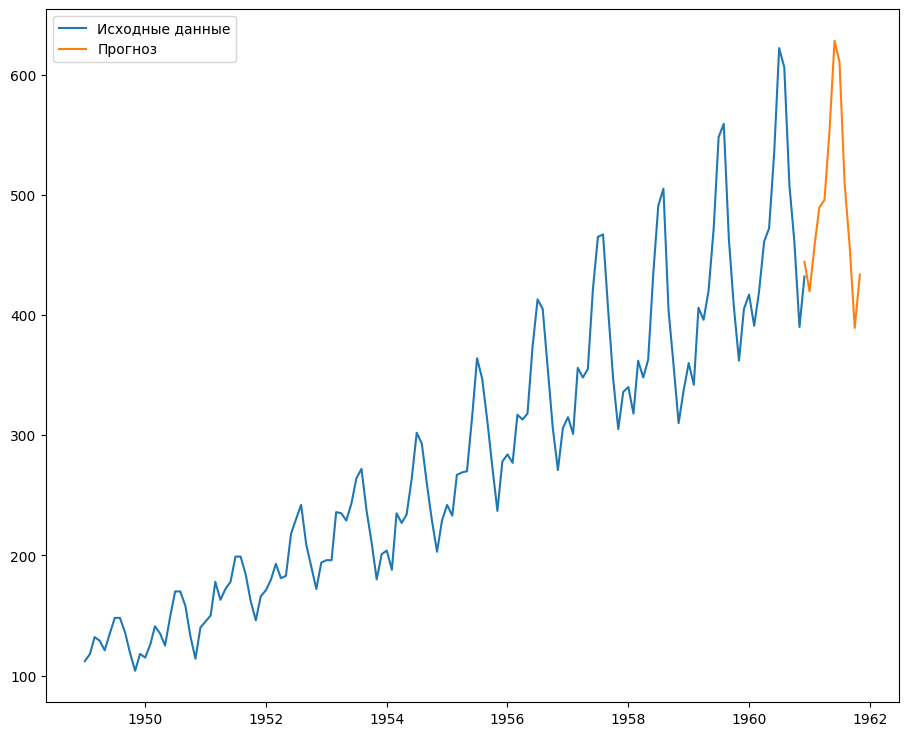

In [71]:
plt.plot(df.index, df['#Passengers'], label='Исходные данные')
plt.plot(future_dates, forecast, label='Прогноз')
plt.legend()
plt.show()